In [2]:
import plac
import spacy




In [3]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_colwidth', 260)


In [4]:
df=pd.read_json('dfObsV01.json');
df=df.sort_index();
len(df)


6699

In [5]:
df.head(10)

,sents,chapter,aso,entities,fner,label
0,Chapter 1,1,{'act': 'Chapter'},[],"[0, 0, 0]",0
1,"On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.",1,{'act': 'On'},[],"[0, 0, 0]",0
2,The testimony of the ages confirms that the motions of the planets are orbicular.,1,"{'act': 'confirms', 'subject': 'testimony'}",[],"[0, 0, 0]",0
3,"Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles.",1,"{'act': 'presumes', 'subject': 'reason', 'obj': 'this: that their gyrations are perfect circles'}",[],"[0, 0, 0]",0
4,"For among figures it is circles, and among bodies the heavens, that are considered the most perfect.",1,{'act': 'considered'},[],"[0, 0, 0]",0
5,"However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes.",1,"{'act': 'gives', 'subject': 'it', 'obj': 'rise '}","[[rise, ASTR]]","[0, 0, 0]",0
6,It is just this from which astronomy arose among humans.,1,"{'act': 'is', 'subject': 'it'}",[],"[0, 0, 0]",0
7,"Astronomy's aim is considered to be to show why the stars' motions appear to be irregular on earth, despite their being exceedingly well ordered in heaven, and to investigate the specific circles whereby the stars may be moved, so that by their aid the pos...",1,{'act': 'considered'},[],"[0, 0, 0]",0
8,"Before the distinction between the first motion(1) and the second motions(2) was established, people noted (in contemplating the sun, moon and stars) that their diurnal paths were visually very nearly equivalent to circles.",1,{'act': 'established'},"[[diurnal, ASTR]]","[0, 0, 0]",0
9,"These were, however, entwined one upon another like yarn on a ball, and the circles were for the most part smaller(3) circles of the sphere, rarely the greatest(4) (such",1,"{'act': 'were', 'subject': 'circles'}",[],"[0, 0, 0]",0


In [6]:
df.tail()

,sents,chapter,aso,entities,fner,label
6694,"To find the position of Mars at opposition, Kepler computed the angular distance that Mars and Earth—now substituting the place of the Sun—moved during 17 hours 20 minutes; Mars moved eastward about 16' 20"" and the Sun westward about 42' 18"".",appendix b,"{'act': 'moved', 'subject': 'mars'}","[[Mars, PLAN], [opposition, ASTR], [Mars, PLAN], [Earth, PLAN], [Sun, PLAN], [17 hours 20 minutes, TIME], [Mars, PLAN], [eastward, ASTR], [16' 20"", LONG], [Sun, PLAN], [42' 18"", LONG]]","[0, 1, 1]",0
6695,"Accordingly, Kepler determined the longitude of Mars at opposition to be 198° 37' 50"" from which he subtracted about 39"" in order to correct Mars's orbit; he got 198° 37' 10"" (18° 37' 10"" Libra).",appendix b,"{'act': 'got', 'subject': 'he', 'obj': '' 10'}","[[longitude, ASTR], [Mars, PLAN], [opposition, ASTR], [198° 37' 50"", LONG], [Mars, PLAN], [orbit, ASTR], [198° 37' 10"", LONG], [18° 37' 10"" Libra, LONG]]","[0, 0, 1]",0
6696,The Sun moved westward and its longitude decreased from the time of observation to its position opposite to Mars.,appendix b,"{'act': 'moved', 'subject': 'sun'}","[[Sun, PLAN], [longitude, ASTR], [observation, ASTR], [Mars, PLAN]]","[0, 0, 0]",0
6697,"Therefore, the time of opposition is 17 hours 20 minutes before March 29, at 21:43, the time when the observation was made.",appendix b,"{'act': 'is', 'subject': 'time'}","[[opposition, ASTR], [17 hours 20 minutes, TIME], [March 29, DATE], [observation, ASTR]]","[1, 1, 0]",0
6698,"Kepler determined the time of opposition on March 28, 4h 23m AM, old style.",appendix b,"{'act': 'determined', 'subject': 'kepler', 'obj': 'the time of opposition on March 28'}","[[opposition, ASTR], [March 28, DATE], [4h 23m, TIME]]","[1, 1, 0]",0


In [24]:
def DepMatcher(doc): 
    subjpass = 0
    for i,tok in enumerate(doc):
    # find dependency tag that contains the text "subjpass"    
        if tok.dep_.find("subjpass") == True:
            subjpass = 1
    x = ''
    y = ''

  # if subjpass == 1 then sentence is passive
    if subjpass == 1:
        for i,tok in enumerate(doc):
            if tok.dep_.find("subjpass") == True:
                y = tok.text

            if tok.dep_.endswith("obj") == True:
                x = tok.text
  
  # if subjpass == 0 then sentence is not passive
    else:
        for i,tok in enumerate(doc):
            if tok.dep_.endswith("subj") == True:
                x = tok.text

            if tok.dep_.endswith("obj") == True:
                y = tok.text

    return x,y

In [29]:
nlp = spacy.load("en_core_web_sm")

In [30]:
DOC="Hence the Pythagoreans, when they shared out musical tones among the stars, gave the lowest (the hypate among the strings of the lyre)1 to the moon, because the motions of both were slowest."

In [32]:
doc=nlp(DOC)
DepMatcher(doc)

('motions', 'both')

In [35]:
df["DepRelation"]=df["sents"].apply(lambda x: DepMatcher(nlp(x))  )

In [36]:
df.head(40)

,sents,chapter,aso,entities,fner,label,DepRelation
0,Chapter 1,1,{'act': 'Chapter'},[],"[0, 0, 0]",0,"(, )"
1,"On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.",1,{'act': 'On'},[],"[0, 0, 0]",0,"(, first)"
2,The testimony of the ages confirms that the motions of the planets are orbicular.,1,"{'act': 'confirms', 'subject': 'testimony'}",[],"[0, 0, 0]",0,"(motions, planets)"
3,"Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles.",1,"{'act': 'presumes', 'subject': 'reason', 'obj': 'this: that their gyrations are perfect circles'}",[],"[0, 0, 0]",0,"(gyrations, this)"
4,"For among figures it is circles, and among bodies the heavens, that are considered the most perfect.",1,{'act': 'considered'},[],"[0, 0, 0]",0,"(bodies, that)"
5,"However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes.",1,"{'act': 'gives', 'subject': 'it', 'obj': 'rise '}","[[rise, ASTR]]","[0, 0, 0]",0,"(which, causes)"
6,It is just this from which astronomy arose among humans.,1,"{'act': 'is', 'subject': 'it'}",[],"[0, 0, 0]",0,"(astronomy, humans)"
7,"Astronomy's aim is considered to be to show why the stars' motions appear to be irregular on earth, despite their being exceedingly well ordered in heaven, and to investigate the specific circles whereby the stars may be moved, so that by their aid the pos...",1,{'act': 'considered'},[],"[0, 0, 0]",0,"(time, positions)"
8,"Before the distinction between the first motion(1) and the second motions(2) was established, people noted (in contemplating the sun, moon and stars) that their diurnal paths were visually very nearly equivalent to circles.",1,{'act': 'established'},"[[diurnal, ASTR]]","[0, 0, 0]",0,"(circles, motions(2)"
9,"These were, however, entwined one upon another like yarn on a ball, and the circles were for the most part smaller(3) circles of the sphere, rarely the greatest(4) (such",1,"{'act': 'were', 'subject': 'circles'}",[],"[0, 0, 0]",0,"(circles, sphere)"


In [40]:
df.tail()

,sents,chapter,aso,entities,fner,label,DepRelation
6694,"To find the position of Mars at opposition, Kepler computed the angular distance that Mars and Earth—now substituting the place of the Sun—moved during 17 hours 20 minutes; Mars moved eastward about 16' 20"" and the Sun westward about 42' 18"".",appendix b,"{'act': 'moved', 'subject': 'mars'}","[[Mars, PLAN], [opposition, ASTR], [Mars, PLAN], [Earth, PLAN], [Sun, PLAN], [17 hours 20 minutes, TIME], [Mars, PLAN], [eastward, ASTR], [16' 20"", LONG], [Sun, PLAN], [42' 18"", LONG]]","[0, 1, 1]",0,"(Sun, 18)"
6695,"Accordingly, Kepler determined the longitude of Mars at opposition to be 198° 37' 50"" from which he subtracted about 39"" in order to correct Mars's orbit; he got 198° 37' 10"" (18° 37' 10"" Libra).",appendix b,"{'act': 'got', 'subject': 'he', 'obj': '' 10'}","[[longitude, ASTR], [Mars, PLAN], [opposition, ASTR], [198° 37' 50"", LONG], [Mars, PLAN], [orbit, ASTR], [198° 37' 10"", LONG], [18° 37' 10"" Libra, LONG]]","[0, 0, 1]",0,"(he, 10)"
6696,The Sun moved westward and its longitude decreased from the time of observation to its position opposite to Mars.,appendix b,"{'act': 'moved', 'subject': 'sun'}","[[Sun, PLAN], [longitude, ASTR], [observation, ASTR], [Mars, PLAN]]","[0, 0, 0]",0,"(longitude, Mars)"
6697,"Therefore, the time of opposition is 17 hours 20 minutes before March 29, at 21:43, the time when the observation was made.",appendix b,"{'act': 'is', 'subject': 'time'}","[[opposition, ASTR], [17 hours 20 minutes, TIME], [March 29, DATE], [observation, ASTR]]","[1, 1, 0]",0,"(21:43, observation)"
6698,"Kepler determined the time of opposition on March 28, 4h 23m AM, old style.",appendix b,"{'act': 'determined', 'subject': 'kepler', 'obj': 'the time of opposition on March 28'}","[[opposition, ASTR], [March 28, DATE], [4h 23m, TIME]]","[1, 1, 0]",0,"(Kepler, March)"


In [41]:
len(set(df.DepRelation))

5160

In [43]:
set(df.DepRelation)

{('model', 'description'),
 ('λβ', 'ecliptic'),
 ('', 'Christ'),
 ('observation', 'axiom'),
 ('placed', 'EO'),
 ('this', '33'),
 ('muscles', 'motions'),
 ('BD', 'Scorpio'),
 ('opinions', 'observations'),
 ('node', 'elongation'),
 ('center', 'world'),
 ('It', 'it'),
 ('that', 'planet'),
 ('question', 'earth'),
 ('inequality', 'motion'),
 ('we', '1595'),
 ('N', 'epicycle'),
 ('disciplines', 'who'),
 ('year', 'operation'),
 ('DE', 'oval'),
 ('circle', 'sector'),
 ('line', 'it'),
 ('100,000', 'distances'),
 ('difference', '45th'),
 ('angles', 'angles'),
 ('premise', 'proof'),
 ('counts', 'ratio'),
 ('H', 'HF'),
 ('one', 'places'),
 ('Scorpio', 'BC'),
 ('I', '147,443'),
 ('γ', 'question'),
 ('', 'sun'),
 ('shortening', 'one'),
 ('excess', 'sines'),
 ('EDA', ''),
 ('center', 'distances'),
 ('triangle', 'side'),
 ('numbering', 'areas'),
 ('Ch', 'this'),
 ('followed', ''),
 ('they', 'AB'),
 ('Ch', 'declinations'),
 ('root', ''),
 ('catalog', 'Mars'),
 ('which', 'reciprocation'),
 ('ζεβ', ''),


In [45]:
df.DepRelation.value_counts()

(, )                    311
(, Ch)                   49
(position, )             17
(we, Ch)                 16
(it, ’)                  16
                       ... 
(28th, parallax)          1
(he, minutes)             1
(sum, )                   1
(distances, minutes)      1
(, lines)                 1
Name: DepRelation, Length: 5160, dtype: int64

In [77]:
import nltk
# tokenize into sentences
from nltk import tokenize
p = "the cat ate the mouse. the mouse ate the cat food. graph could be consider as connections."
sentences=tokenize.sent_tokenize(p)


In [78]:
sentences

['the cat ate the mouse.',
 'the mouse ate the cat food.',
 'graph could be consider as connections.']

In [79]:
# compute similarity with dice coeffcient.
def dice_coefficient(a, b):
    a_bigrams = set(a)
    print(a_bigrams)
    b_bigrams = set(b)
    overlap = len(a_bigrams & b_bigrams)
    print(overlap)
    return overlap * 2.0/(len(a_bigrams) + len(b_bigrams))



In [86]:
dice_coefficient(sentences[0],sentences[2])

{'c', 'u', 's', 'a', 'o', 'm', '.', 't', 'e', ' ', 'h'}
10


0.6896551724137931

In [81]:
edges = [(i,j,dice_coefficient(x,y)) 
         for i,x in enumerate(sentences) 
         for j,y in enumerate(sentences) if i < j]

{'c', 'u', 's', 'a', 'o', 'm', '.', 't', 'e', ' ', 'h'}
11
{'c', 'u', 's', 'a', 'o', 'm', '.', 't', 'e', ' ', 'h'}
10
{'u', 'c', 'd', 's', 'a', 'f', 'o', 'm', '.', 't', 'e', ' ', 'h'}
11


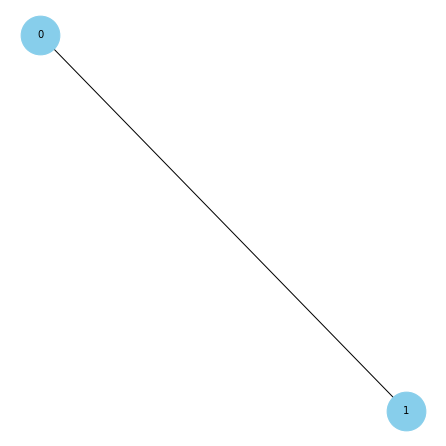

In [98]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
G = nx.Graph()
G.add_edges_from((i,j) for i,j,sim in edges if sim >= .71)
pos = nx.spring_layout(G, k = 0.8)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos,font_size=10)
plt.show()

1-how to add the whole sentence label? 
2- connecting similarity with casuality?
3-ndicate  how  twotext spans are logically connected



In [38]:
print(G)